In [1]:
%matplotlib ipympl
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties
from scipy.special import genlaguerre    #genlaguerre(n, alpha)
import matplotlib as mpl

from matplotlib.lines import Line2D
import ipywidgets as widgets
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as ticker

In [2]:
W = 1.5 #um(10**-6m)

def Factorial(n):
    f=1
    for i in range(1,n+1,1):
        f*=i 
    return f

def Laguerre(rho,l,p):
    l = np.abs(l)
    L = 0
    for m in range(p+1):
        L += (-1)**m * Factorial(l+p) / (Factorial(p-m)*Factorial(l+m)*Factorial(m)) * (2*(rho/W)**2)**m
    return L

def f(rho,l,p):
    l = np.abs(l)
    f = np.sqrt((Factorial(p)*2)/(np.pi*Factorial(l+p))) * np.exp(-(rho/W)**2) * (np.sqrt(2)*rho/W)**l * Laguerre(rho,l,p)
    return f 
    
def u(phi,rho,l,p):
    u = f(rho,l,p) * np.exp(complex(0,1)*l*phi)
    return u


In [3]:
number=20
def B(l, q, rho):
    l = np.abs(l)
    B = 0
    for i in range(0,number+1,1):
        B = B + (-(q*rho)**2/4)**i / (Factorial(i)*Factorial(l+i))
        # B += rho / Factorial(i)
        
    B *= (q*rho/2)**l
    return B

In [4]:
def fun(q,rho,l,p):
        y = rho*B(l,q,rho)*f(rho,l,p)
        return y

In [5]:
h=0.001
p=0
def H(q,l):
    # h = np.power(0.1,3)
    max = 3.5
    min = 0
    
    sim = 0
    rho = min+h/2
    while (rho<max):
        sim += h/6 * (fun(q, rho-h/2, l, p)+4*fun(q, rho, l, p)+fun(q, rho+h/2, l, p))
        rho += h
    
    return sim

In [6]:
H(q=1,l=0)

0.5129524484670841

In [28]:
gamma = 2.94/2

def integral(q, phiq, l):
    int = np.abs(2*np.pi*(-complex(0,1))**np.abs(l)*H(q,l)*np.exp(complex(0,1)*l*phiq))**2 * np.abs(gamma*np.abs(q)*np.exp(2*complex(0,1)*phiq))**2
    return int

h2=0.01
def int_phiq(q, l):
    max = 2*np.pi
    min = 0
    sim2 = 0
    phiq = min+h2/2
    while (phiq<max):
        sim2 += h2/6 * (integral(q, phiq-h2/2, l)+4*integral(q, phiq, l)+integral(q, phiq+h2/2, l))
        phiq += h2
    return sim2

h3=0.01
def int_q(l):
    max = 15
    min = 0
    sim3 = 0
    q    = min+h3/2
    while (q<max):
        sim3+= h3/6 * (int_phiq(q-h3/2, l)+4*int_phiq(q, l)+int_phiq(q+h3/2, l))
        q   += h3
    return sim3

In [29]:
def tau(l):
    l = np.abs(l)
    Tau = 1 / int_q(l)
    return Tau

In [ ]:
fig, ax = plt.subplots()

taul = []
for l in range(0,3,1):
    taul += [tau(l)]

ax.plot( np.arange(0,3,1), taul, 'o',color='black' )
for i, v in enumerate(taul):
        ax.text(i+0.25, v+0.01, "%2.2f" %v, ha="center")    
    
ax.grid()
ax.set_xlabel('$\ell$', fontsize=16)
ax.set_ylabel('$τ_{KK\'}^{\ell}/τ_{KK\'}^{\ell=0}$', fontsize=16)
ax.set_xlim(-0.8, 6.8)
plt.show()

In [26]:
def A(phiq,q,l,p):
    A = np.abs(2*np.pi*(-complex(0,1))**np.abs(l)*H(q,l)*np.exp(complex(0,1)*l*phiq))**2
    return A

0


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

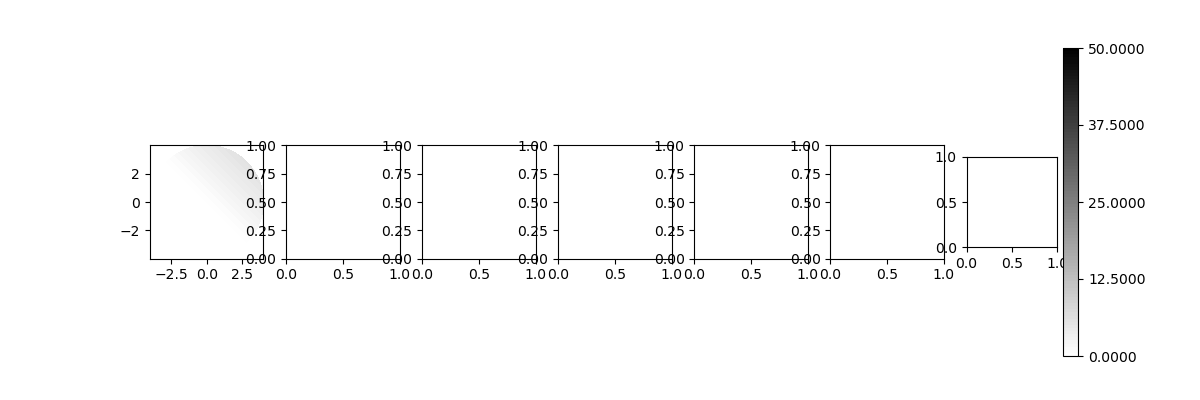

In [27]:
fig, ax = plt.subplots(1,7,figsize=(12, 4))
for s in range(7):
    ax[s].set_aspect('equal', adjustable='box')
    ax[s].set_box_aspect(1)
    
R=4
LIM = 50
q = np.linspace(0, R, 4)
phiq = np.linspace(0, 2*np.pi, 100)
#計算2D資料
q, phiq = np.meshgrid(q, phiq)
x, y = q*np.cos(phiq), q*np.sin(phiq)
p=0
fig.colorbar(ax[0].contourf(x, y, (x+y), levels=np.linspace(0,LIM,100), cmap='gist_yarg'), ax=ax[6], format="{x:.4f}", ticks=np.linspace(0,LIM, 5))

for s in range(6):
    l = s
    print(s)
    ax[s].contourf(x, y, A(phiq,q,l,p), levels=np.linspace(0,LIM,100), cmap='gist_yarg')
    
    
ax[0].set_xlabel('q$_{x}$')
ax[0].set_ylabel('q$_{y}$',rotation=0)

plt.tight_layout()
plt.show()  

In [ ]:
---------------------------------------------------------------------------------------------------------------------------------------

In [78]:
def uanalytic(phiq,q,l):
    uanalytic = (-complex(0,1))**np.abs(l)*np.sqrt(2*np.pi/Factorial(np.abs(l))) * W**2 * (q*W/np.sqrt(2))**np.abs(l) * np.exp(-q**2*W**2/4) * np.exp(complex(0,1)*l*phiq)
    return uanalytic

In [93]:
p=0
gamma = 2.94/2
def integral(q, phiq, l):
    int = np.abs(uanalytic(phiq,q,l))**2 * np.abs(gamma*np.abs(q)*np.exp(2*complex(0,1)*phiq))**2
    return int

h2=0.01
def int_phiq(q, l):
    max = 2*np.pi
    min = 0
    sim2 = 0
    phiq = min+h2/2
    while (phiq<max):
        sim2 += h2/6 * (integral(q, phiq-h2/2, l)+4*integral(q, phiq, l)+integral(q, phiq+h2/2, l))
        phiq += h2
    return sim2

# def int_phiq(q, l):
#     sim2 = 2*np.pi *q* np.abs( (-complex(0,1))**np.abs(l) * np.sqrt(2*np.pi/Factorial(np.abs(l))) * W**2 * (q*W/np.sqrt(2))**np.abs(l) * np.exp(-q**2*W**2/4))**2 * np.abs(gamma*q)**2
#     return sim2

h3=0.01
def int_q(l):
    max = 4
    min = 0
    sim3 = 0
    q    = min+h3/2
    while (q<max):
        sim3+= h3/6 * (int_phiq(q-h3/2, l)*(q-h3)+4*int_phiq(q, l)*q+int_phiq(q+h3/2, l)*(q+h3))
        q   += h3
    return sim3

def tau(l):
    l = np.abs(l)
    Tau = 1 / int_q(l)
    return Tau

In [111]:
def tau_mathematica(l):
    l = np.abs(l)
    Tau = 1 / ( 4*np.pi*gamma**2*Factorial(l+1)*(2*np.pi/Factorial(l)) )
    return Tau

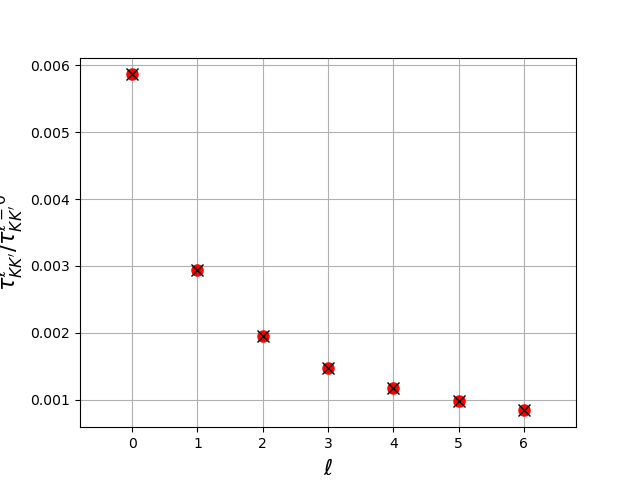

In [114]:
fig, ax = plt.subplots()

taul = []
taul_mathmetica = []
for l in range(0,7,1):
    taul += [tau(l)]
    taul_mathmetica += [tau_mathematica(l)]

ax.plot( np.arange(0,7,1), taul, markersize=8, marker='o', linewidth=0, color='red' )  
# ax.plot( np.arange(0,7,1), taul_mathmetica, markersize=3, marker='o', linewidth=0, color='blue' )  
    
ax.plot( np.arange(0,7,1), tau(0)/(np.abs(np.arange(0,7,1))+1), 'x', markersize=8, color='black')

ax.grid()
ax.set_xlabel('$\ell$', fontsize=16)
ax.set_ylabel('$τ_{KK\'}^{\ell}/τ_{KK\'}^{\ell=0}$', fontsize=16)
ax.set_xlim(-0.8, 6.8)
plt.show()

In [96]:
np.arange(0,7,1)

array([0, 1, 2, 3, 4, 5, 6])

In [97]:
def A(phiq,q,l):
    A = np.abs(uanalytic(phiq,q,l))**2
    return A

0
1
2
3
4
5


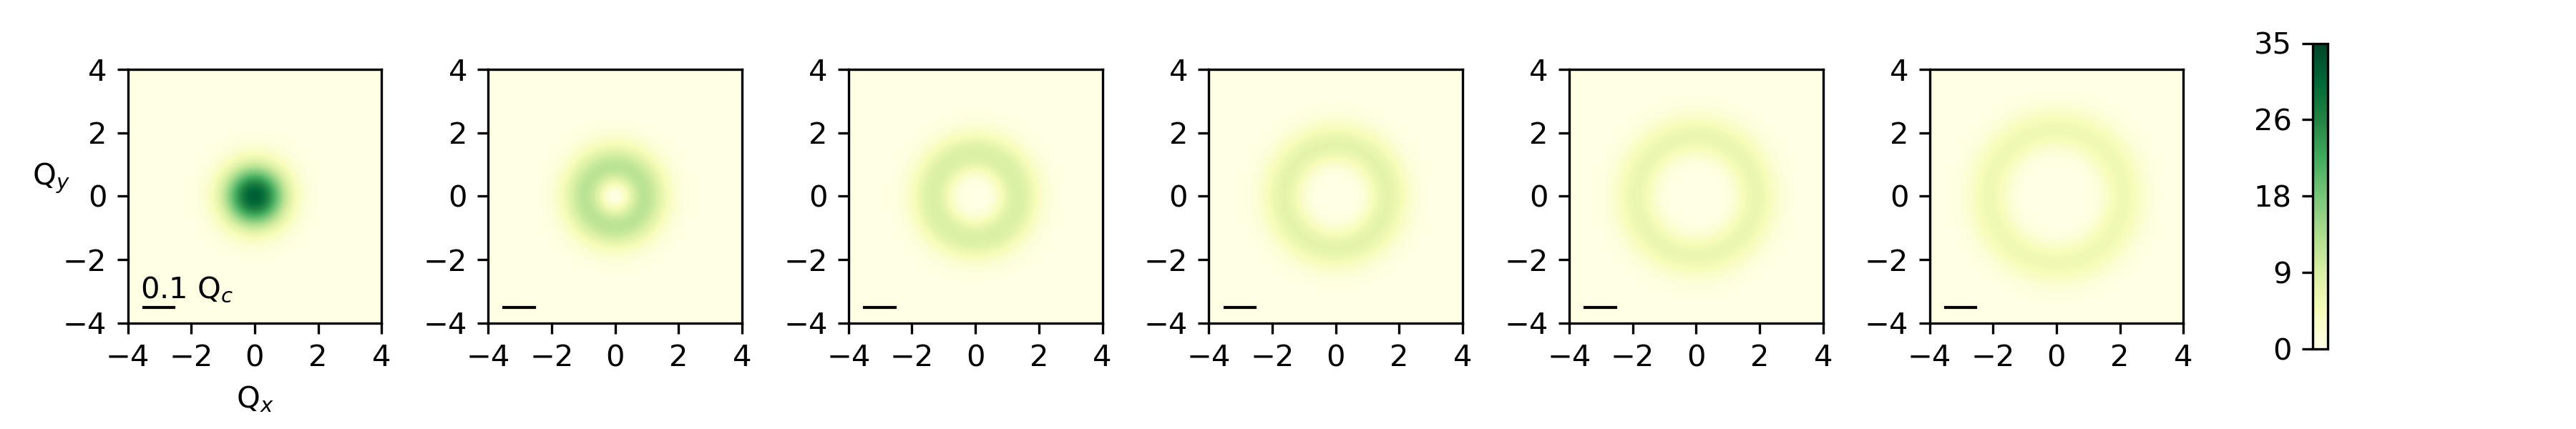

In [126]:
fig, ax = plt.subplots(1,7,figsize=(12, 2), dpi=300)
for s in range(7):
    ax[s].set_aspect('equal', adjustable='box')
    ax[s].set_box_aspect(1)
fig.delaxes(ax[6])

R=6
LIM = 35
q = np.linspace(0, R, 500)
phiq = np.linspace(0, 2*np.pi, 500)
#計算2D資料
q, phiq = np.meshgrid(q, phiq)
x, y = q*np.cos(phiq), q*np.sin(phiq)
fig.colorbar(ax[0].contourf(x, y, (x+y), levels=np.linspace(0,LIM,500), cmap='YlGn'), ax=ax[6], format="{x:.0f}", ticks=np.linspace(0,LIM, 5), location='left')

for s in range(6):
    l = s
    print(s)
    ax[s].contourf(x, y, A(phiq,q,l), levels=np.linspace(0,LIM,100), cmap='YlGn')
    ax[s].add_line(Line2D(np.linspace(-3.5, -3.5+9.6/10, 50),np.linspace(-3.5, -3.5, 50) ,linewidth=1, linestyle='-', color='black'))
    ax[s].set_xticks(np.arange(-4, 6, 2))
    ax[s].set_yticks(np.arange(-4, 6, 2))
    ax[s].set_xlim(-4, 4)
    ax[s].set_ylim(-4, 4)
    
    
ax[0].set_xlabel('Q$_{x}$')
ax[0].set_ylabel('Q$_{y}$',rotation=0)
ax[0].annotate("0.1 Q$_c$", xy=(0.05, 0.1),xycoords=ax[0])
plt.tight_layout()
plt.show()    

In [115]:
np.linspace(-3.3, -3.3, 50)

array([-3.3, -3.3, -3.3, -3.3, -3.3, -3.3, -3.3, -3.3, -3.3, -3.3, -3.3,
       -3.3, -3.3, -3.3, -3.3, -3.3, -3.3, -3.3, -3.3, -3.3, -3.3, -3.3,
       -3.3, -3.3, -3.3, -3.3, -3.3, -3.3, -3.3, -3.3, -3.3, -3.3, -3.3,
       -3.3, -3.3, -3.3, -3.3, -3.3, -3.3, -3.3, -3.3, -3.3, -3.3, -3.3,
       -3.3, -3.3, -3.3, -3.3, -3.3, -3.3])

In [133]:
a=0
i=0
a=a+0.01
while (a<2*np.pi):
    print(a, i)
    a+=0.01
    i+=1

0.01 0
0.02 1
0.03 2
0.04 3
0.05 4
0.060000000000000005 5
0.07 6
0.08 7
0.09 8
0.09999999999999999 9
0.10999999999999999 10
0.11999999999999998 11
0.12999999999999998 12
0.13999999999999999 13
0.15 14
0.16 15
0.17 16
0.18000000000000002 17
0.19000000000000003 18
0.20000000000000004 19
0.21000000000000005 20
0.22000000000000006 21
0.23000000000000007 22
0.24000000000000007 23
0.25000000000000006 24
0.26000000000000006 25
0.2700000000000001 26
0.2800000000000001 27
0.2900000000000001 28
0.3000000000000001 29
0.3100000000000001 30
0.3200000000000001 31
0.3300000000000001 32
0.34000000000000014 33
0.35000000000000014 34
0.36000000000000015 35
0.37000000000000016 36
0.38000000000000017 37
0.3900000000000002 38
0.4000000000000002 39
0.4100000000000002 40
0.4200000000000002 41
0.4300000000000002 42
0.4400000000000002 43
0.45000000000000023 44
0.46000000000000024 45
0.47000000000000025 46
0.48000000000000026 47
0.49000000000000027 48
0.5000000000000002 49
0.5100000000000002 50
0.52000000000000